This example was taken from the book **The Essence of Chaos** by *Edward Lorenz*. 

$$\frac{dX}{dt} = U, \ \frac{dY}{dt} = V, \ \frac{dZ}{dt} = W.$$

\begin{align}
\frac{dU}{dt} &= -FH_X - cU, \\
\frac{dV}{dt} &= -FH_Y - cV, \\
\frac{dW}{dt} &= -g + F - cW.
\end{align}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
a = 0.25
b = 0.5
q = (2*np.pi)/4.0
p = (2*np.pi)/10.0

def H_test(x,y):
    return -a*x - b*np.cos(p*x)*np.cos(q*y) 

In [5]:
x_range = np.linspace(0, 20, 200)
y_range = np.linspace(0, 20, 200)

In [6]:
XX, YY = np.meshgrid(x_range, y_range)

In [7]:
moguls = H_test(XX, YY)

In [8]:
from mpl_toolkits.mplot3d import Axes3D

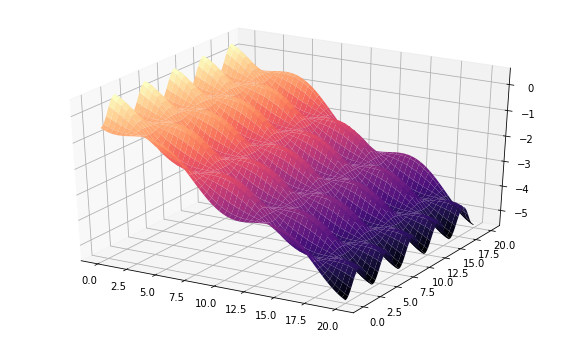

In [9]:
fig = plt.figure(figsize=(10,6))
ax = fig.gca(projection='3d')

ax.plot_surface(XX, YY, moguls, cmap = 'magma')

In [10]:
from scipy.integrate import RK45

In [15]:
def slopez(x0,y0, F, H, c):
    
    g = 9.81
    c = 0.5
    a = 0.25
    b = 0.5
    p = (2*np.pi)/10.0
    q = (2*np.pi)/4.0
    
    H = -a*x0 - b*np.cos(p*x0)*np.cos(q*y0) 
    H_x = -a + b*p*np.sin(p*x0)*np.cos(q*y0)
    H_xx = b*p^2 * np.cos(p*x0)*np.cos(q*y0)
    H_y = b*q*np.cos(p*x0)*np.sin(q*y0)
    H_yy = b*q^2 * np.cos(p*x0)*np.cos(q*y0)
    H_xy = -b*q*p*np.sin(p*x0)*np.sin(q*y0)
        
    F = (g + H_xx*u0^2 + 2*H_xy*u0*v0 + H_yy*v0^2)/(1 + H_x^2 + H_y^2)
    
    dU = -F*H_x - c*u0
    dV = -F*H_y - c*v0

In [11]:
def dx(x0):
    return u0

def dy(y0):
    return v0

def dU(u0, F, H_x, c):
    return -F*H_x - c*u0

def dV(v0, F, H_y, c):
    return -F*H_y - c*v0

In [14]:
def sledge(x0, y0, u0, v0, n, dt):
    
    g = 9.81
    c = 0.5
    a = 0.25
    b = 0.5
    p = (2*np.pi)/10.0
    q = (2*np.pi)/4.0
   
    solution = zeros(n+1, 2)
    solution[1, 1] = x0
    solution[1,2] = y0
    
    for i in range(2, n+1):
        
        H = -a*x0 - b*np.cos(p*x0)*np.cos(q*y0) 
        H_x = -a + b*p*np.sin(p*x0)*np.cos(q*y0)
        H_xx = b*p^2 * np.cos(p*x0)*np.cos(q*y0)
        H_y = b*q*np.cos(p*x0)*np.sin(q*y0)
        H_yy = b*q^2 * np.cos(p*x0)*np.cos(q*y0)
        H_xy = -b*q*p*np.sin(p*x0)*np.sin(q*y0)
        
        F = (g + H_xx*u0^2 + 2*H_xy*u0*v0 + H_yy*v0^2)/(1 + H_x^2 + H_y^2)
        u_new = runge_kutta_step_2(dU, u0, dt, F, H_x, c)
        v_new = runge_kutta_step_2(dV, v0, dt, F, H_y, c)
        x_new = x0 + u0 * dt
        y_new = y0 + v0*dt
        
        solution[i, 1] = x_new
        solution[i, 2] = y_new
        
        x0 = copy(x_new)
        y0 = copy(y_new)
        u0 = copy(u_new)
        v0 = copy(v_new)
    
    return solution

In [ ]:
RK45()

In [ ]:
class Moguls:
    
    def __init__( self, nmembers = 1):
        
        self.a = 0.25
        self.b = 0.5
        self.q = (2*np.pi)/4.0
        self.p = (2*np.pi)/10.0
        self.nmembers = nmembers
        
    def dx(x0):
        return u0

    def dy(y0):
        return v0

    def dU(u0, F, H_x, c):
        return -F*H_x - c*u0

    def dV(v0, F, H_y, c):
        return -F*H_y - c*v0
